In [114]:
# This too has its limitations, 
# if the given variable is largely dependent on any external factors our Model will not give the best results.

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

In [116]:
data = pd.read_csv("PCEPersonalSpending.csv",parse_dates=True,index_col="Date")

In [117]:
data.index.freq="MS"

In [118]:
data.tail()

,Spending
Date,
2015-08-01,12394.0
2015-09-01,12392.8
2015-10-01,12416.1
2015-11-01,12450.1
2015-12-01,12469.1


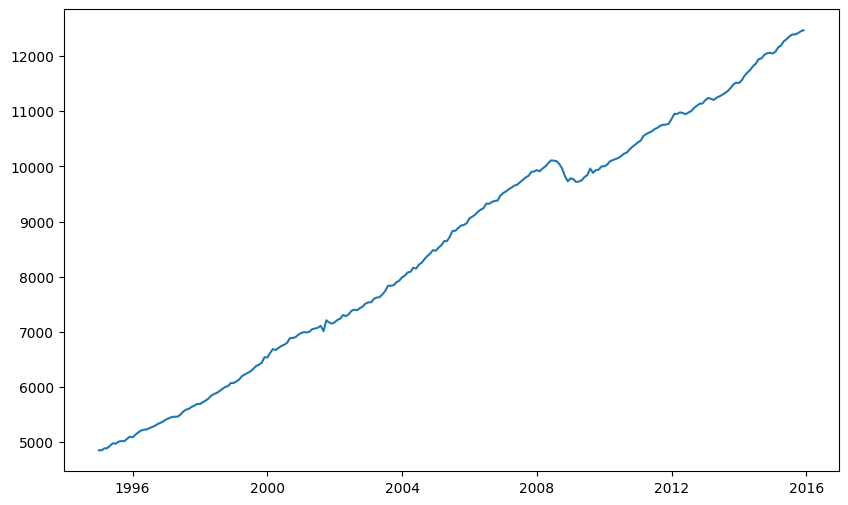

In [119]:
plt.figure(figsize=(10,6))
plt.plot(data)

---
### Check for Seasonal Decompose

In [120]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [121]:
results = seasonal_decompose(data,model='Additive')

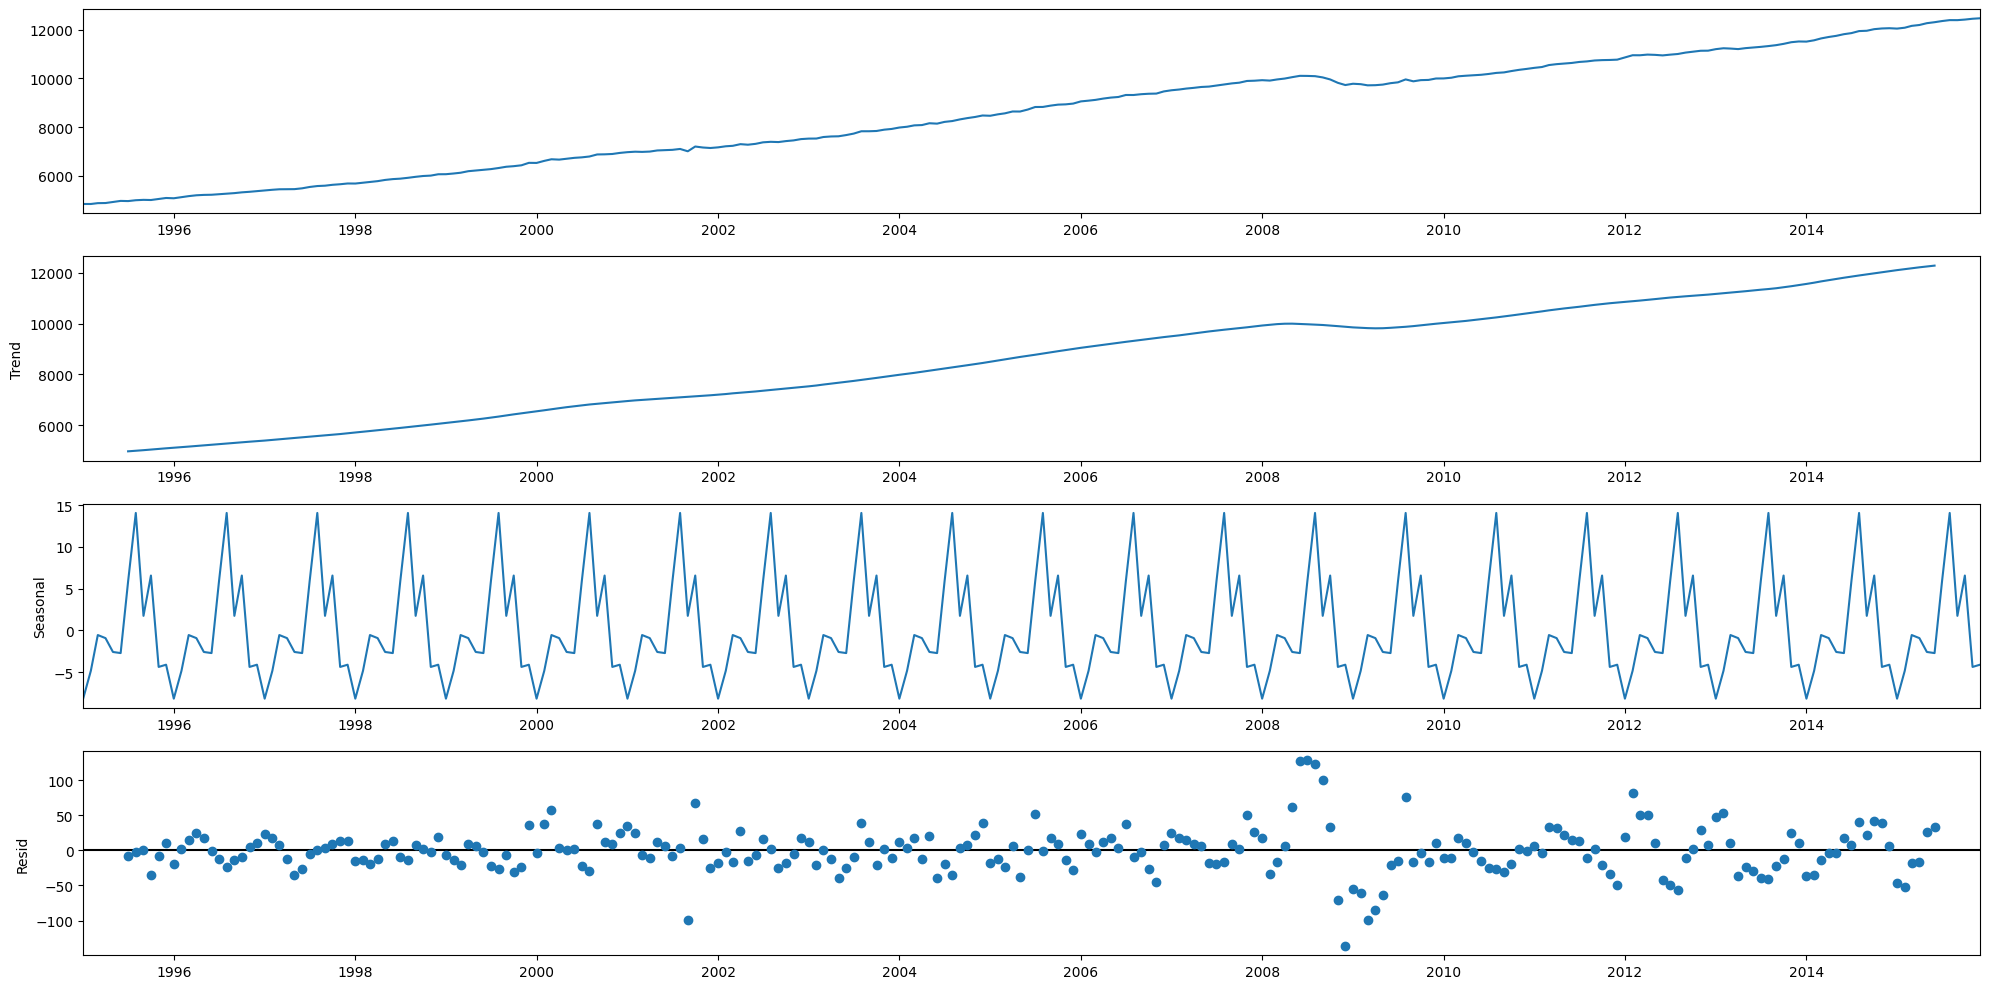

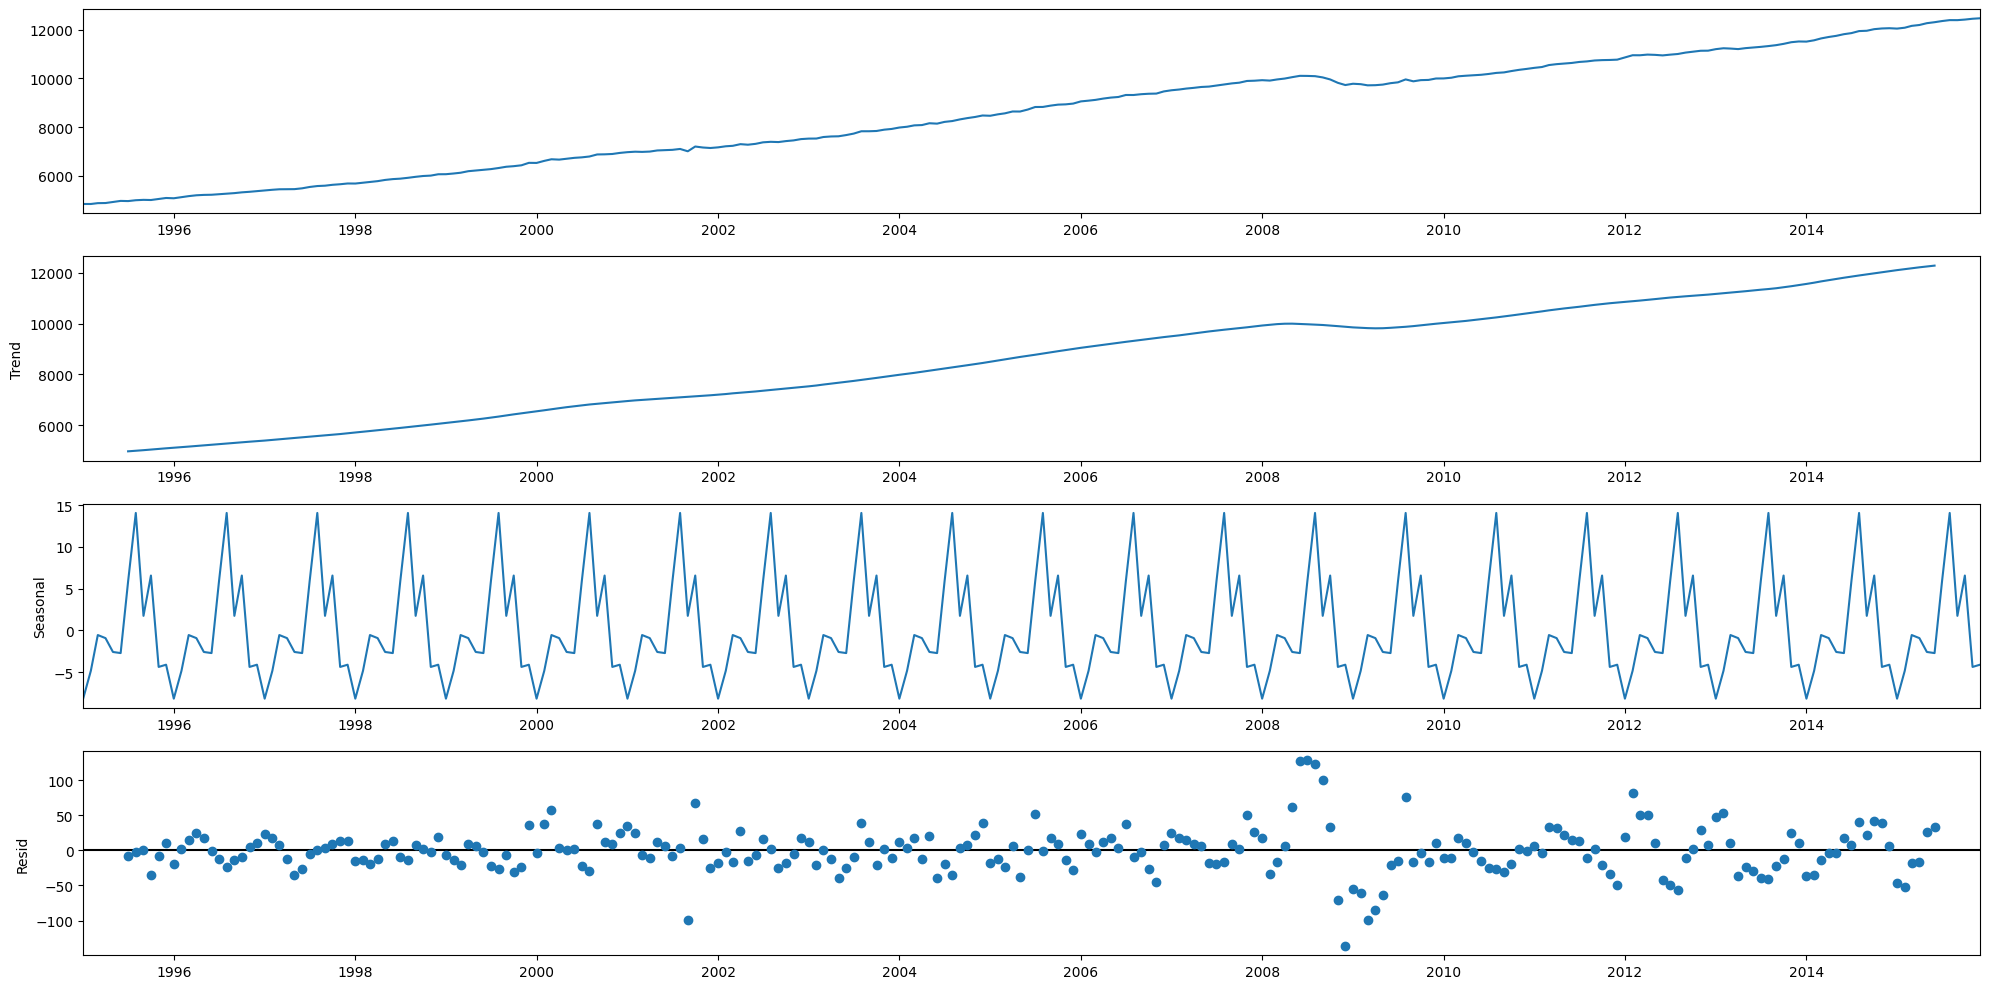

In [122]:
results.plot()

---
### Check for Stationary

```
p < 0.5 , Stationary
p > 0.5 , Is not Stationary
```

In [123]:
from statsmodels.tsa.stattools import adfuller

In [124]:
f'p-value: {adfuller(data,autolag="AIC")[1]}'

'p-value: 0.9693009944428311'

---
### Select Model

1. ARIMA
    ```
    * Convert data to stationary
    * Choose the p, d, q parameters. (p : # of Lags in AR, d : Degree of differencing, q : Order of MA model
    ```
    
    > Auto Arima
    > Automatically discover the optimal order for an ARIMA model.
    > The auto-ARIMA process seeks to identify the most optimal
    parameters for an `ARIMA` model

In [125]:
from pmdarima import auto_arima


In [126]:
result = auto_arima(data,seasonal=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2489.269, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2491.179, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2493.109, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2493.123, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2634.224, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2487.202, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2490.649, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2488.774, Time=0.16 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2489.179, Time=0.25 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2489.688, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2487.240, Time=0.15 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2496.732, Time=0.09 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
Total fit time: 1.699 seconds


In [127]:
from statsmodels.tsa.arima.model import ARIMA

In [128]:
model = ARIMA(data,order=(1,1,2))
result = model.fit()
start = len(data)
end = len(data) - 1


In [129]:
pred = result.predict(data.index[0].strftime("%Y-%m-%d"),
                      data.index[-1].strftime("%Y-%m-%d"),
                      typ="levels",
                      dynamic=False) # levels , use original data 

<AxesSubplot: xlabel='Date'>

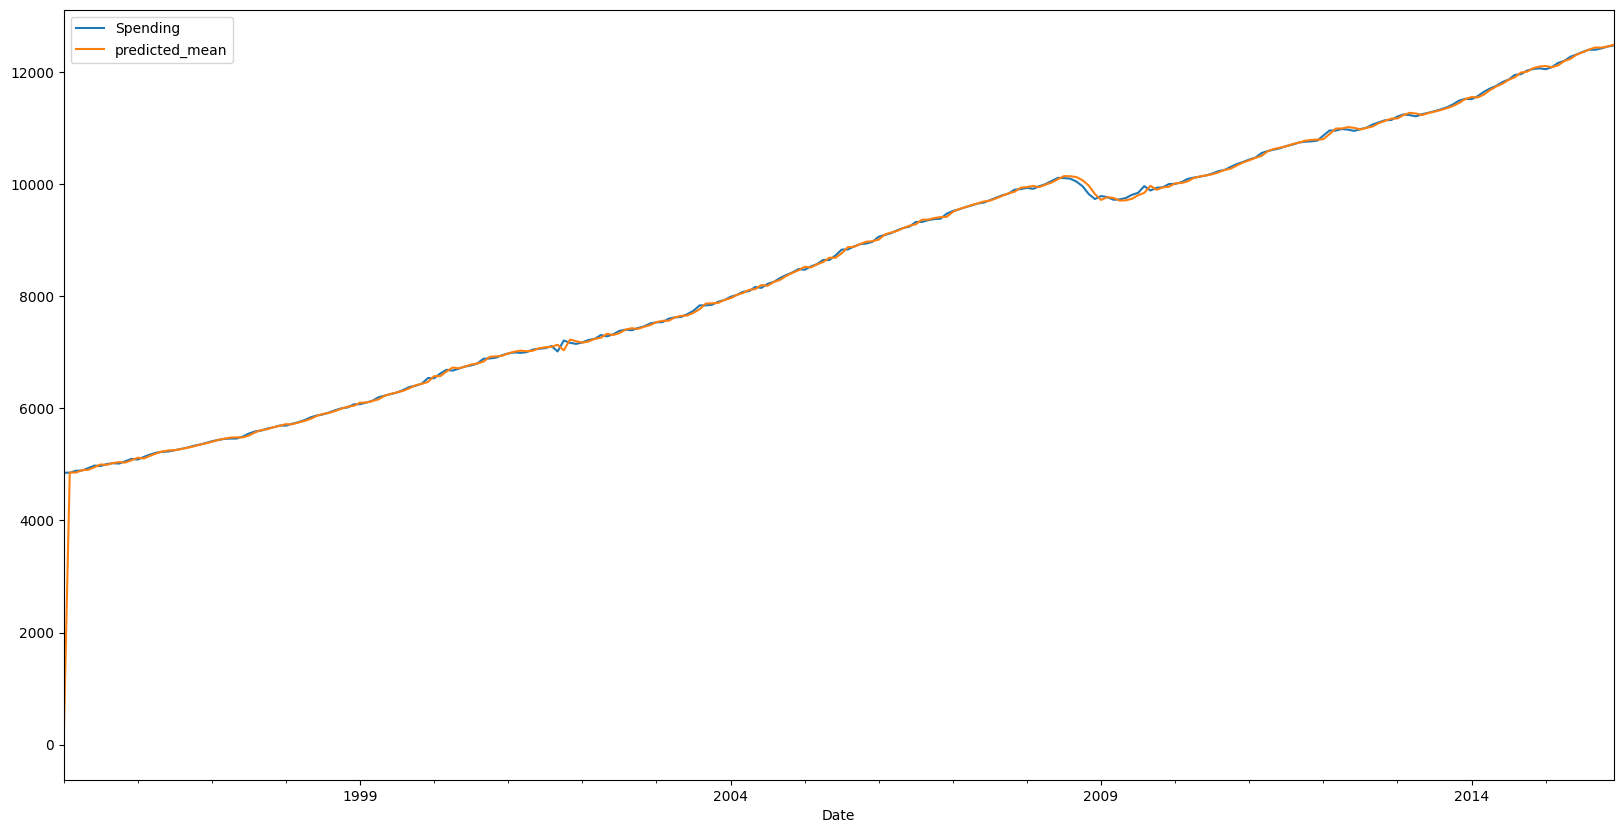

In [130]:
data.plot()
pred.plot(legend=True)

In [131]:
from statsmodels.tools.eval_measures import rmse

In [132]:
error = rmse(data,pred)
f'Arima(1,1,2) RMSE: {error}'

'Arima(1,1,2) RMSE: [8847.31279439 4324.67810827 4326.37466775 4289.3266873  4284.8075773\n 4245.08153898 4203.09802627 4209.62215973 4180.89687796 4167.40902622\n 4174.51561147 4140.20394212 4102.62027584 4112.08775572 4073.91104908\n 4037.77011896 4007.20214482 3993.58019878 3989.75295543 3972.76633993\n 3953.77123983 3935.92246285 3909.45922238 3890.21072883 3867.67494046\n 3840.66762403 3821.50278914 3805.31629858 3801.98406558 3803.07708259\n 3776.67334555 3731.01884623 3697.8541131  3685.40150649 3657.22349352\n 3638.15819833 3613.74414096 3615.91759511 3590.84621125 3569.53217124\n 3539.58546692 3499.6247718  3471.98800325 3457.85199007 3431.69629463\n 3400.31273154 3374.52741404 3362.21258346 3321.39791827 3318.84239889\n 3299.15465456 3276.36459638 3229.32045576 3206.09650183 3185.96003881\n 3166.7417566  3134.92545964 3097.21029655 3080.21661968 3056.17051127\n 2986.63551138 2986.27523008 2931.91352221 2886.64599328 2895.849746\n 2875.71095714 2853.28490731 2841.17008197 2820

In [133]:
error

array([8847.31279439, 4324.67810827, 4326.37466775, 4289.3266873 ,
       4284.8075773 , 4245.08153898, 4203.09802627, 4209.62215973,
       4180.89687796, 4167.40902622, 4174.51561147, 4140.20394212,
       4102.62027584, 4112.08775572, 4073.91104908, 4037.77011896,
       4007.20214482, 3993.58019878, 3989.75295543, 3972.76633993,
       3953.77123983, 3935.92246285, 3909.45922238, 3890.21072883,
       3867.67494046, 3840.66762403, 3821.50278914, 3805.31629858,
       3801.98406558, 3803.07708259, 3776.67334555, 3731.01884623,
       3697.8541131 , 3685.40150649, 3657.22349352, 3638.15819833,
       3613.74414096, 3615.91759511, 3590.84621125, 3569.53217124,
       3539.58546692, 3499.6247718 , 3471.98800325, 3457.85199007,
       3431.69629463, 3400.31273154, 3374.52741404, 3362.21258346,
       3321.39791827, 3318.84239889, 3299.15465456, 3276.36459638,
       3229.32045576, 3206.09650183, 3185.96003881, 3166.7417566 ,
       3134.92545964, 3097.21029655, 3080.21661968, 3056.17051

---

### Data Preprocessing 

In [134]:
df = pd.read_csv('city_temperature.csv')

In [135]:
df = df[df['Country']== 'Sri Lanka']

In [136]:
df.head(5)

,Region,Country,State,City,Month,Day,Year,AvgTemperature
506037,Asia,Sri Lanka,NaN,Colombo,1,1,1995,86.1
506038,Asia,Sri Lanka,NaN,Colombo,1,2,1995,79.2
506039,Asia,Sri Lanka,NaN,Colombo,1,3,1995,81.5
506040,Asia,Sri Lanka,NaN,Colombo,1,4,1995,79.5
506041,Asia,Sri Lanka,NaN,Colombo,1,5,1995,81.0


In [137]:
# df.apply(lambda i: f"{i['Year']}-{i['Month']}-{i['Day']}",axis=1)
df['Date'] = pd.to_datetime(df['Year'].astype(str)+"-"+df['Month'].astype(str)+"-"+df['Day'].astype(str))

In [138]:
dff = df[(df['Date'] >= '2016-01-01') & (df['Date'] <= '2020-05-10') & (df['AvgTemperature'] > 0)]

In [139]:
dff.set_index(dff['Date'],inplace=True)

In [140]:
dff.drop(['Region','Date','Country','State','City','Month','Day','Year'],axis=1,inplace=True)

In [141]:
dff.describe()

,AvgTemperature
count,1576.000000
mean,81.767766
std,2.191971
min,73.800000
25%,80.300000
50%,81.900000
75%,83.300000
max,87.500000


{'whiskers': [<matplotlib.lines.Line2D at 0x2198bb6d610>,
 'caps': [<matplotlib.lines.Line2D at 0x2198bb6db50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2198bb6d370>],
 'medians': [<matplotlib.lines.Line2D at 0x2198bdd60d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2198bdd6370>],
 'means': []}

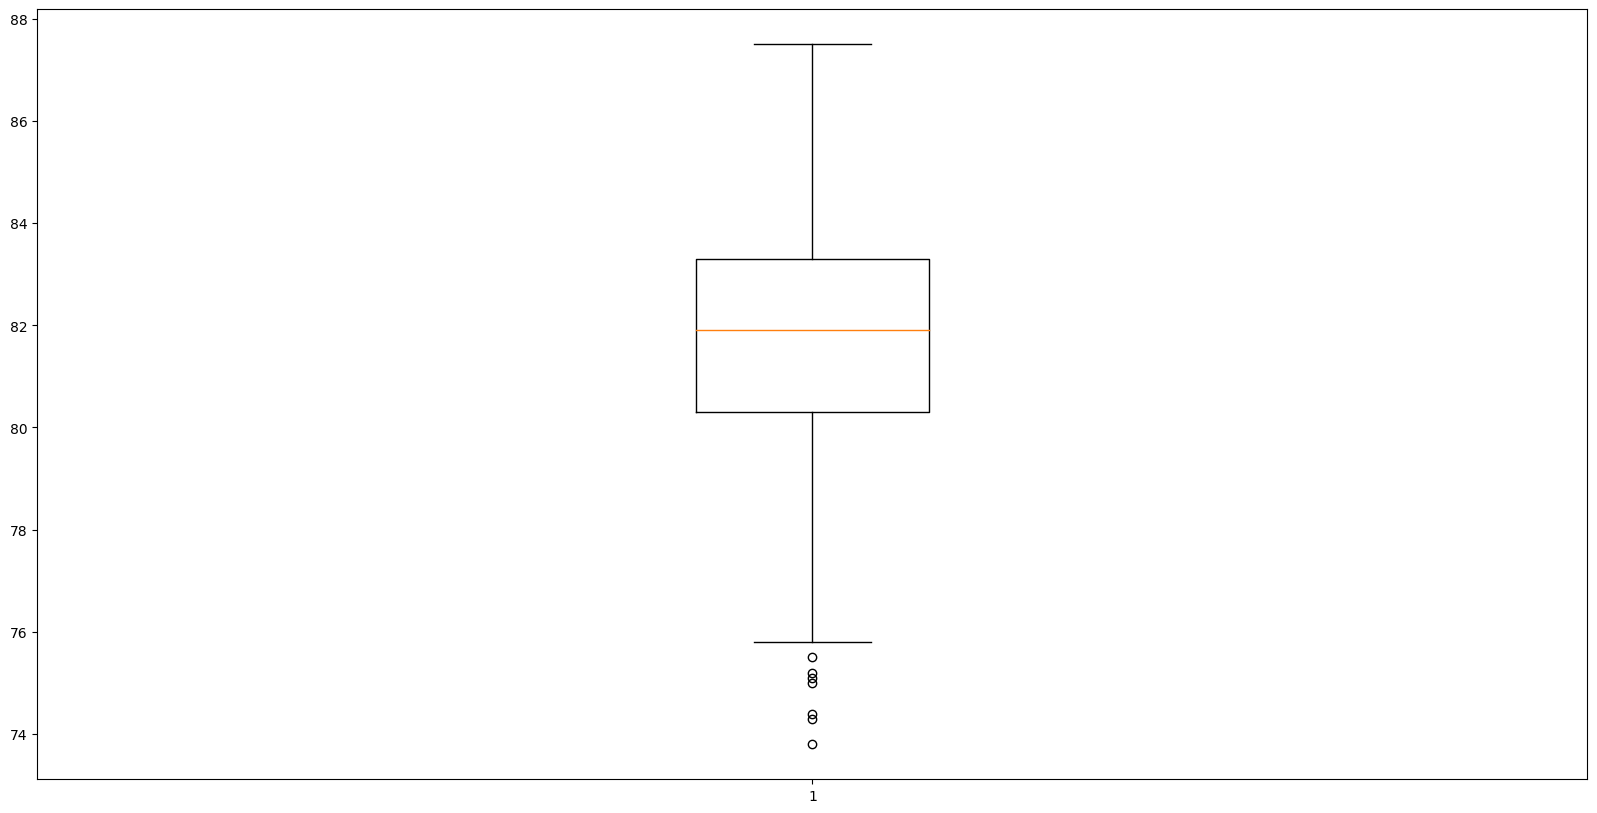

In [142]:
plt.boxplot(dff['AvgTemperature'])

(array([  5.,  16.,  48., 141., 256., 365., 355., 255., 118.,  17.]),
 array([73.8 , 75.17, 76.54, 77.91, 79.28, 80.65, 82.02, 83.39, 84.76,
        86.13, 87.5 ]),
 <BarContainer object of 10 artists>)

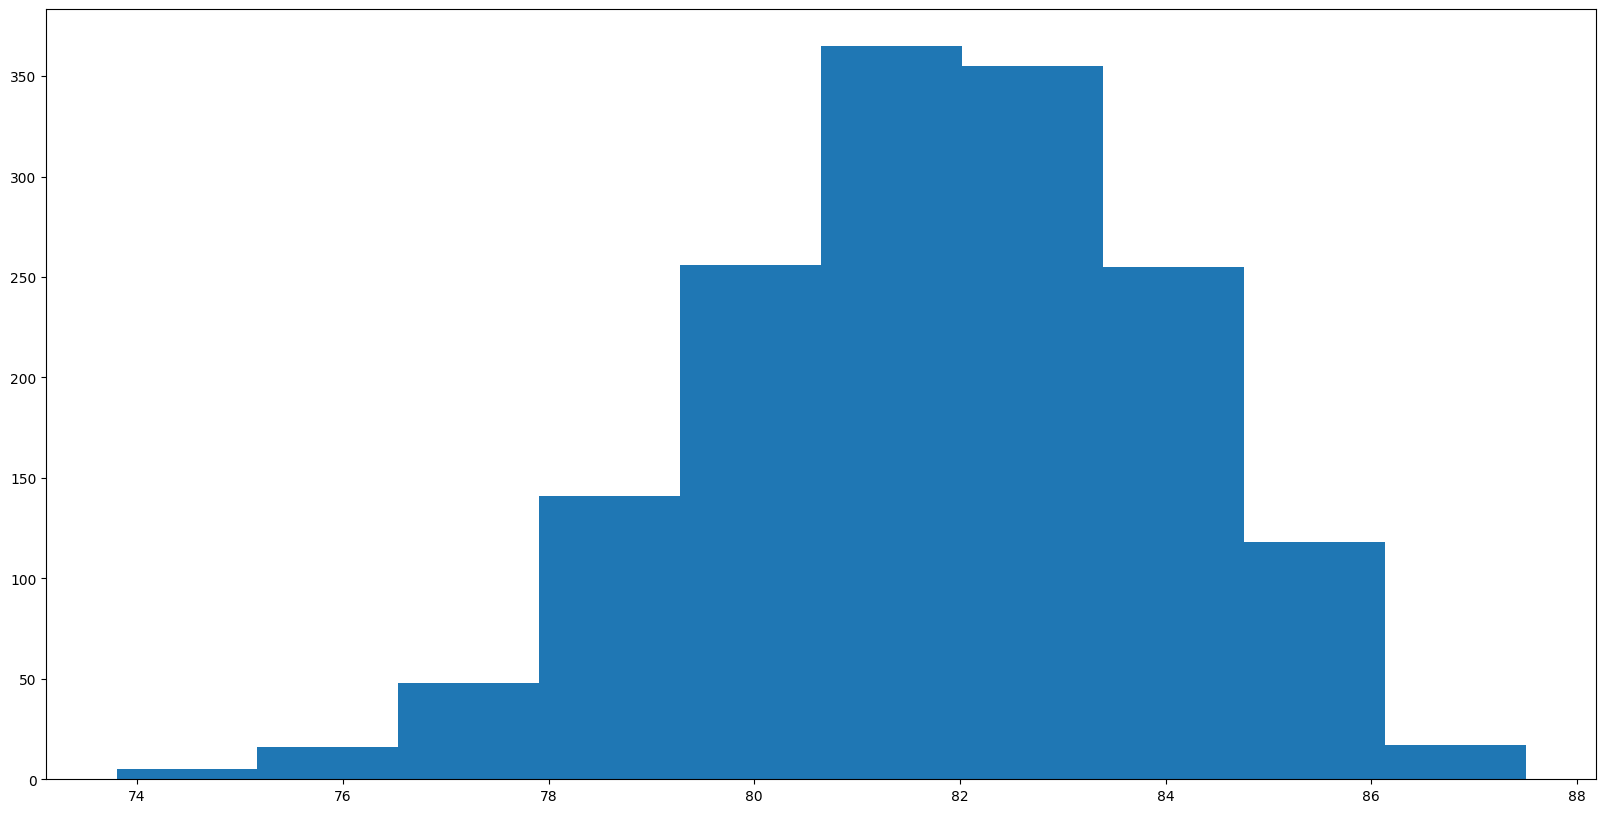

In [143]:
plt.hist(dff['AvgTemperature'])

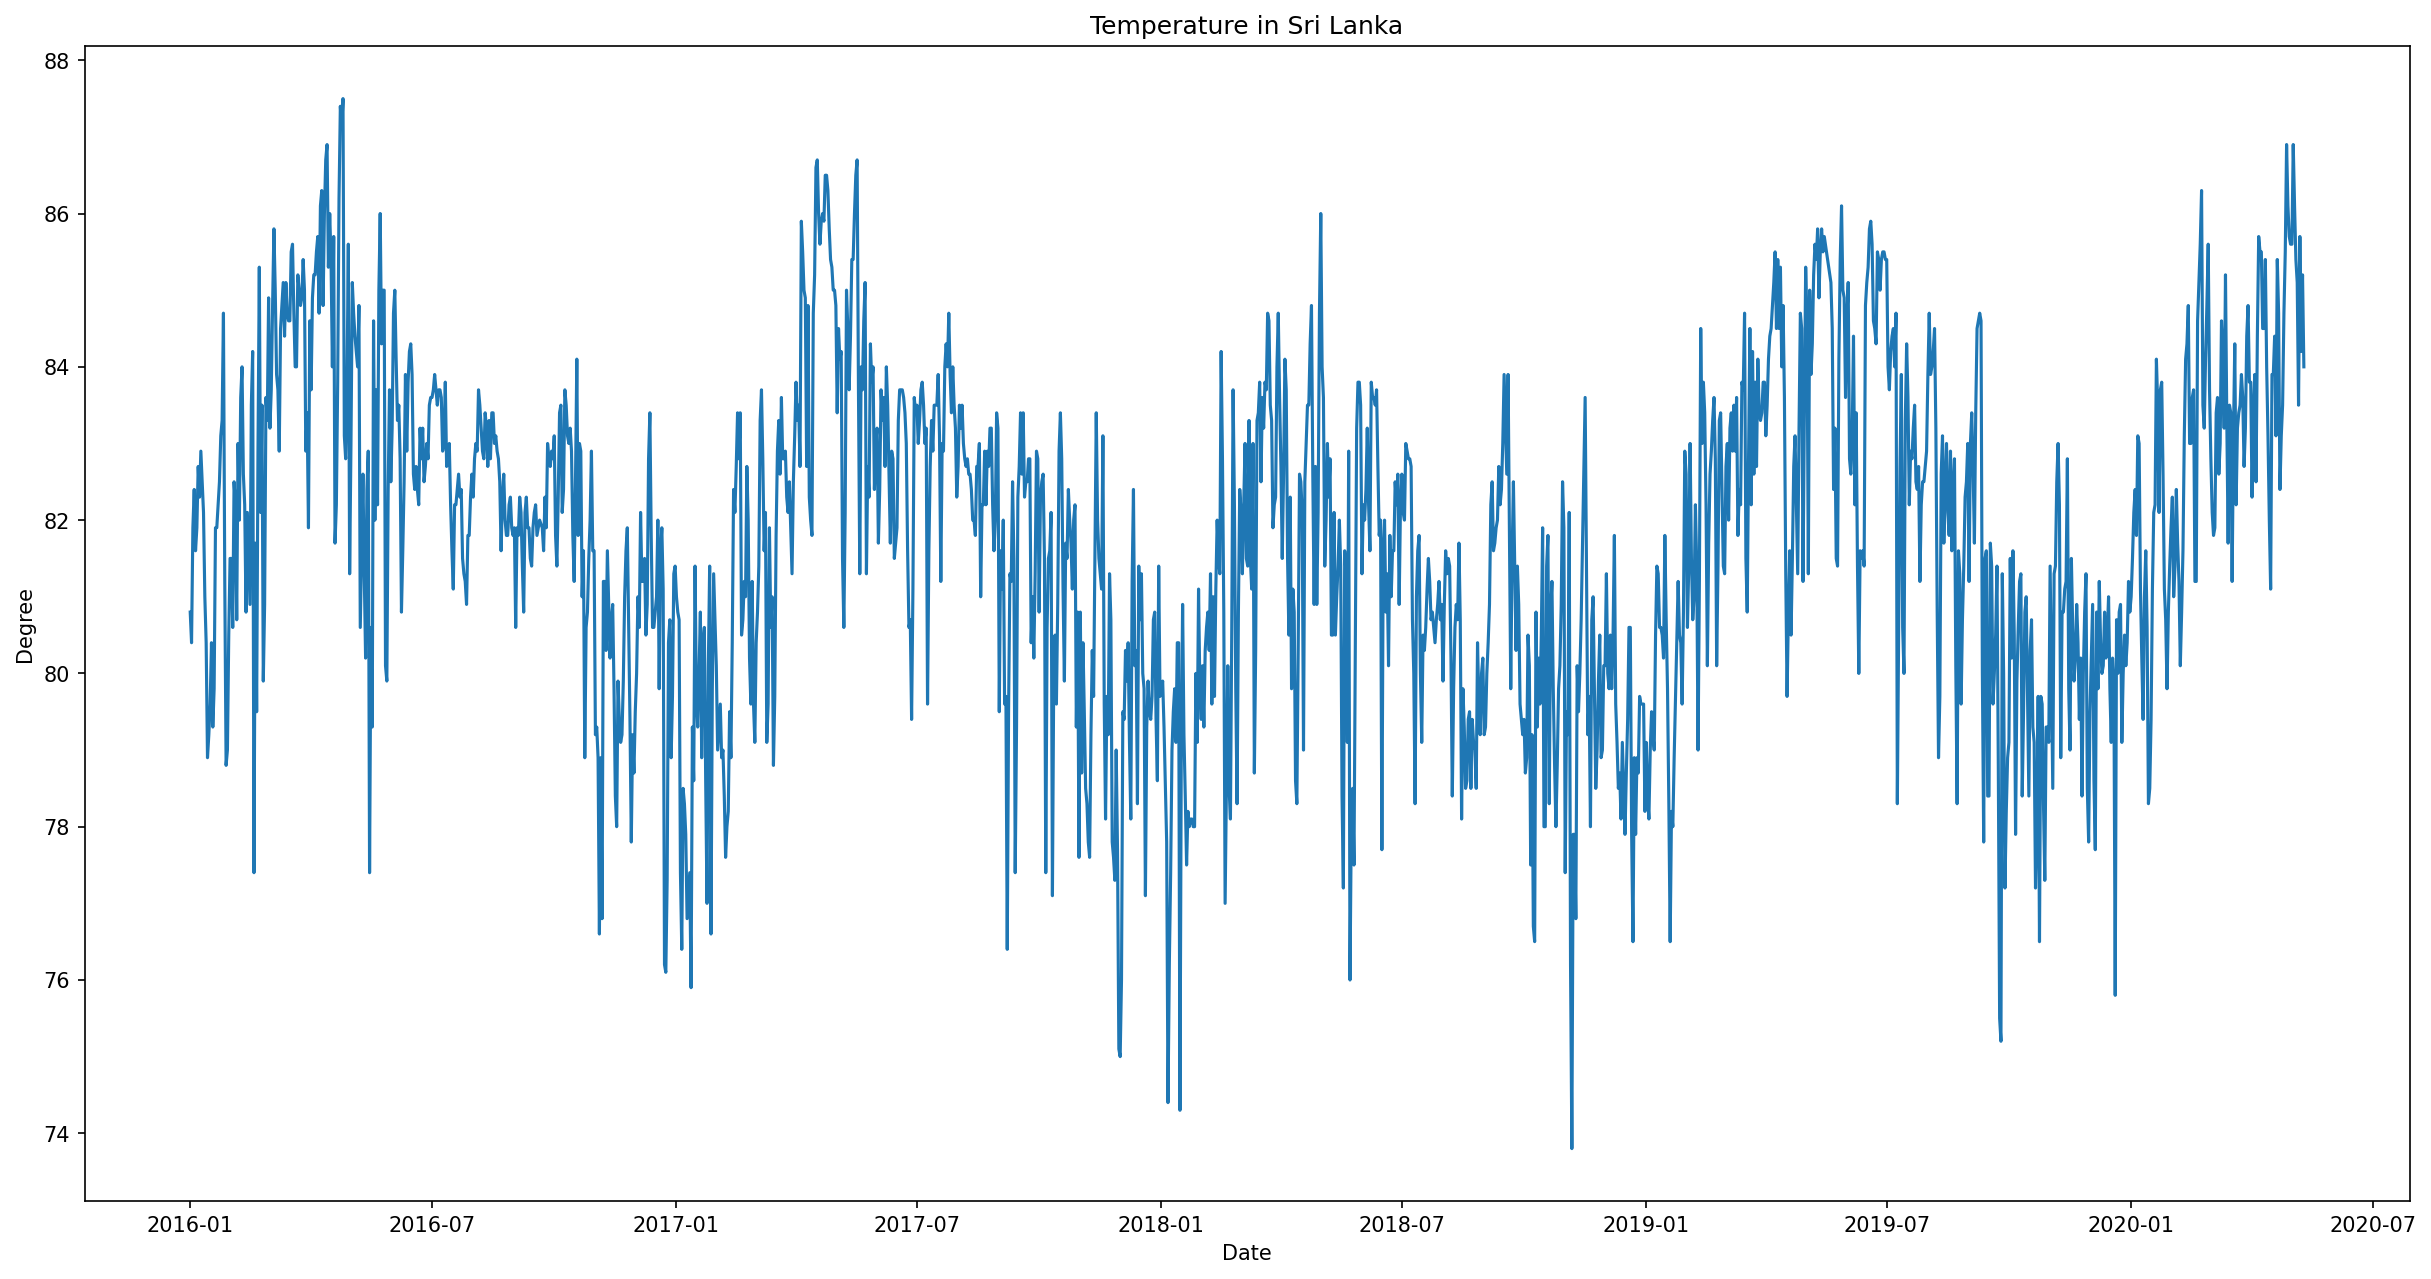

In [144]:
plt.figure(figsize=(20,10),dpi=150)
plt.plot(dff.index,dff['AvgTemperature'],c='tab:blue')
plt.gca().set(
    title='Temperature in Sri Lanka',
    xlabel='Date',
    ylabel='Degree'
)
plt.show()


<AxesSubplot: title={'center': 'Temperature in Sri lanka 2016 to 2020'}, xlabel='Date'>

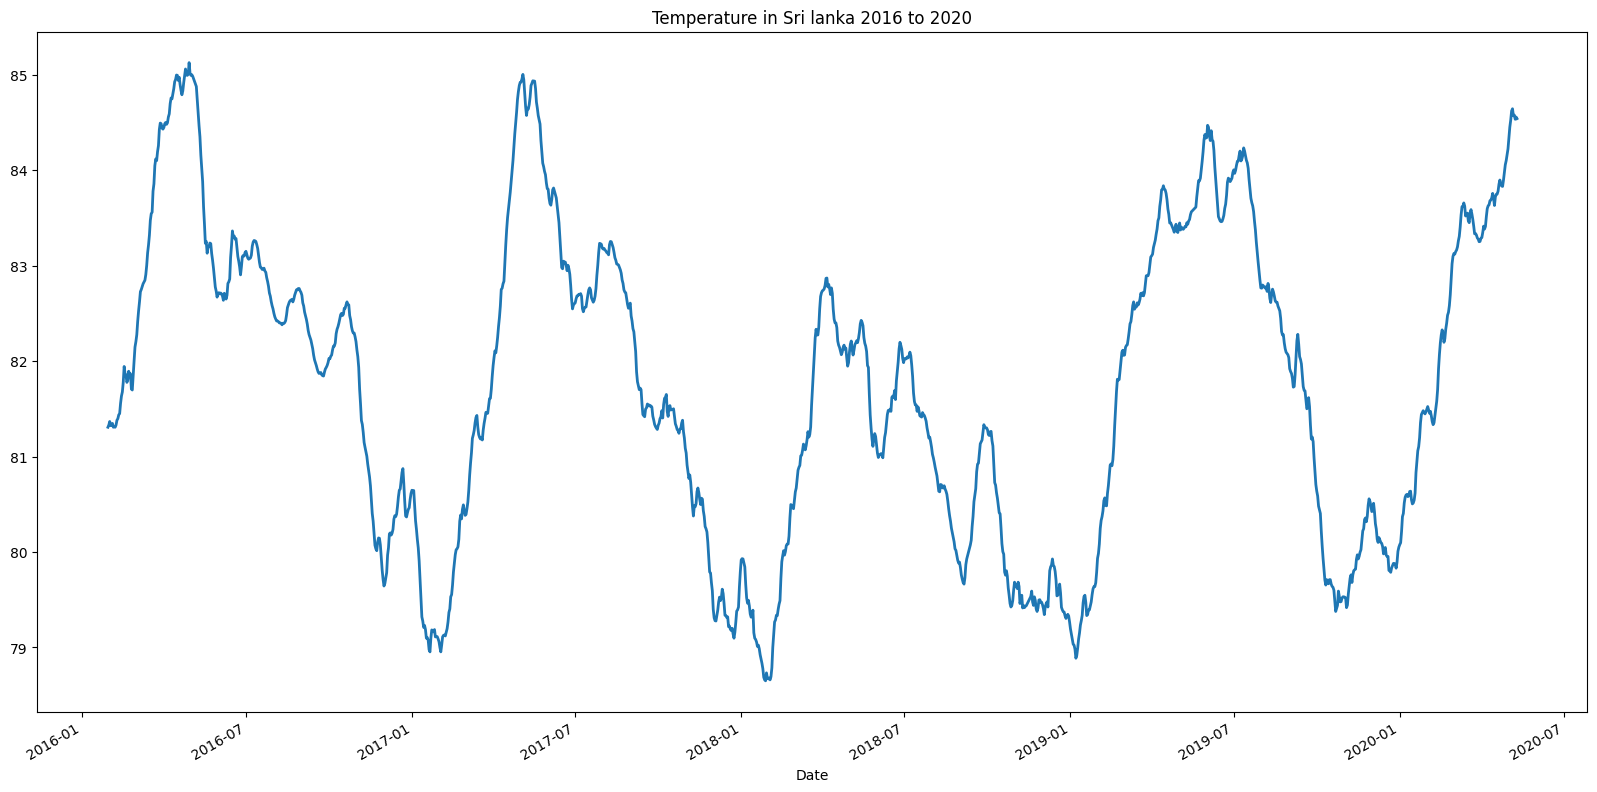

In [145]:
# Pandas has prebuilt method to easier the application of the Moving Average Smoothing as rolling(). Throughout this method you can provide specific time period as a window size. 
# As a example window size 30 means, we use 30 days as a one window
dff.AvgTemperature.rolling(window=30).mean().plot(figsize=(20, 10), linewidth=2, y='Degree(Fahrenheit)',
color='tab:blue', title='Temperature in Sri lanka 2016 to 2020')

In [146]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [147]:
result_add = seasonal_decompose(
    dff['AvgTemperature'],
    model='additive',
    period=365, extrapolate_trend='freq'
)

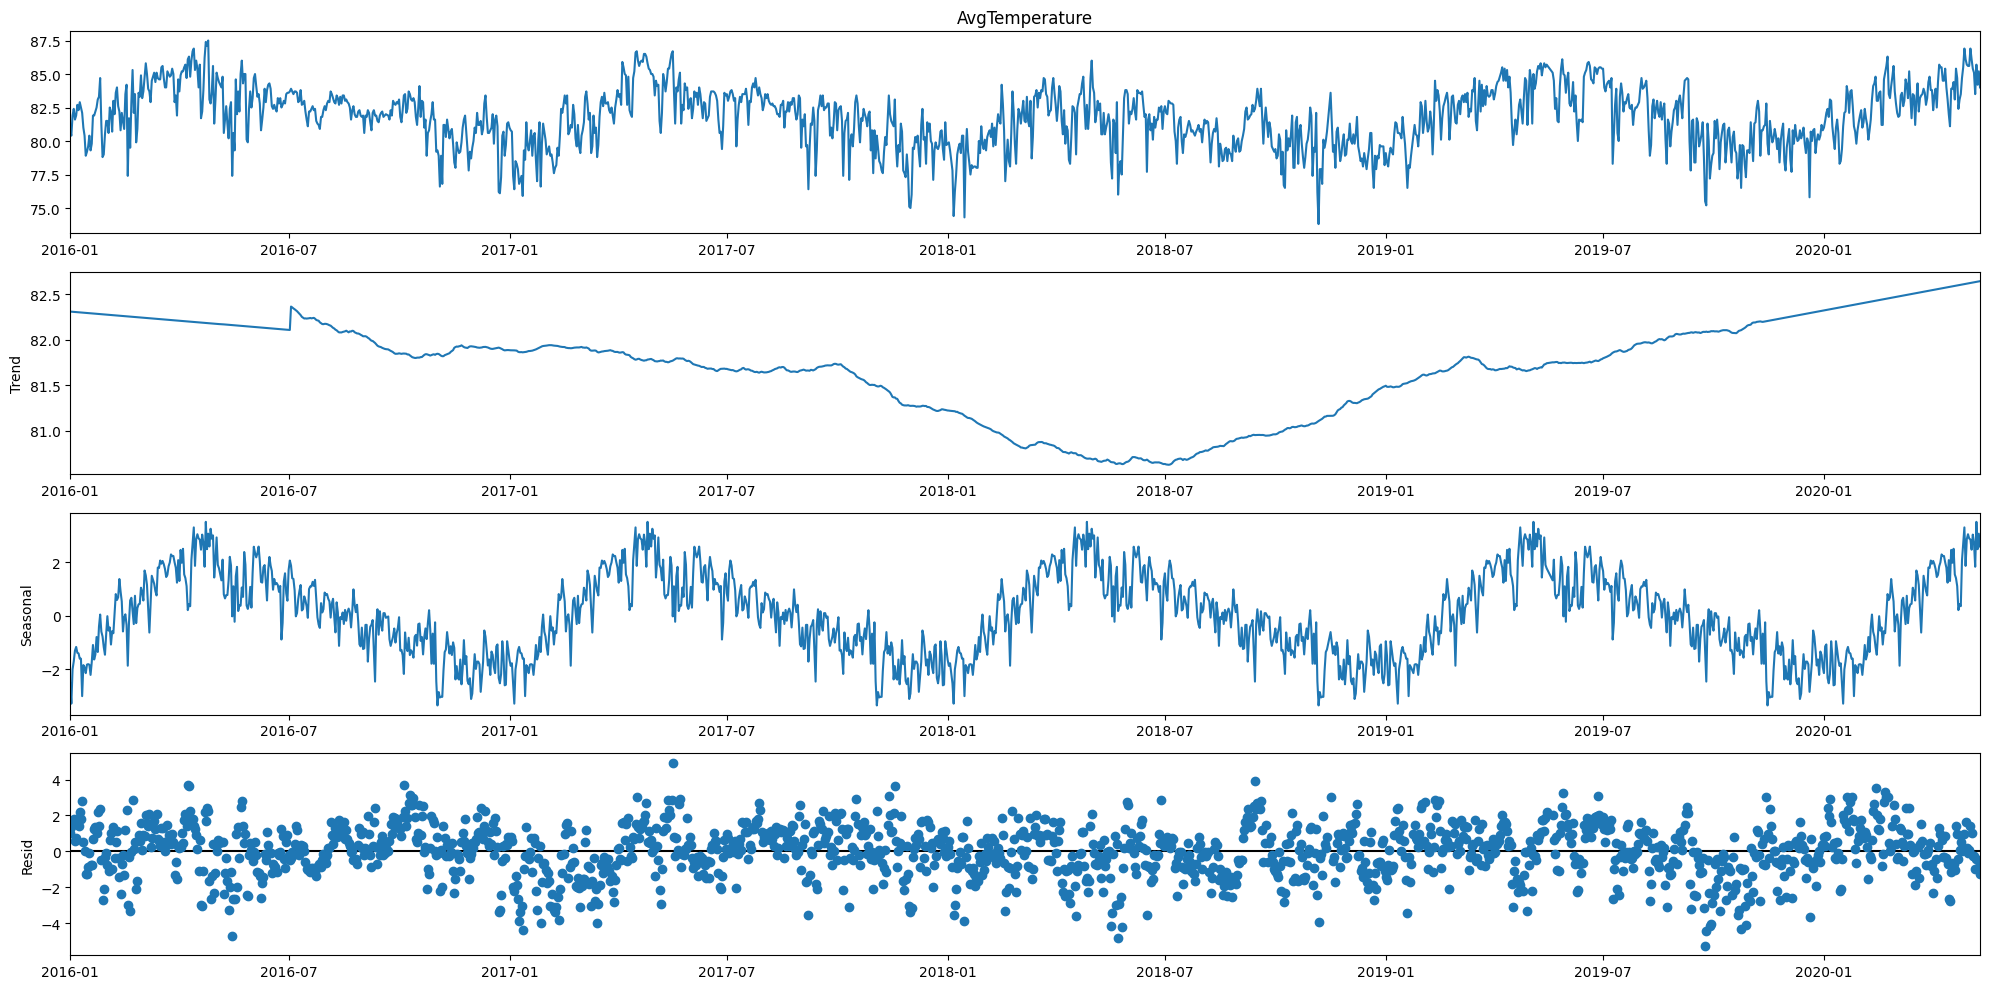

In [148]:
plt.rcParams.update({'figure.figsize': (20, 10)})
result_add.plot().suptitle('', fontsize=15)
plt.show()

In [149]:
import itertools

p = d = q = range(0, 2)
#generate patterns from p,q,r
pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for SARIMA..')
print('SARIMAX: {} * {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} * {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} * {}'.format(pdq[2], seasonal_pdq[2]))
print('SARIMAX: {} * {}'.format(pdq[3], seasonal_pdq[2]))

Examples of parameter combinations for SARIMA..
SARIMAX: (0, 0, 1) * (0, 0, 1, 12)
SARIMAX: (0, 0, 1) * (0, 0, 1, 12)
SARIMAX: (0, 1, 0) * (0, 1, 0, 12)
SARIMAX: (0, 1, 1) * (0, 1, 0, 12)


In [150]:
import statsmodels.api as sm
import warnings

In [153]:
sarima_dict = {}

In [154]:
warnings.filterwarnings("ignore")
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(
                dff.AvgTemperature,
                order=param, seasonal_order=param_seasonal,
                enforce_stationarity=False,
                enforce_invertibility=False)
            results = mod.fit()
#             print('SARIMA{}*{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            sarima_dict[f'{param}*{param_seasonal}'] = results.aic
        except:
            continue

In [169]:
for k,v in sarima_dict.items():
    if v == sorted(list(sarima_dict.values()))[0]:
        print(k)

(1, 1, 1)*(0, 0, 1, 12)


considering the different combinations and their AIC values, we can choose a combination which have minimum value of AIC. The reason to select lower combination AIC because it will be the better-fit to the model.

In [170]:
mod = sm.tsa.statespace.SARIMAX(
    dff.AvgTemperature,
    order=(1, 1, 1), seasonal_order=(0, 0, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False)
results = mod.fit()